In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('Titanic-Dataset.csv')
print(df.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
#a
print(df.isnull().sum())
col_to_drop=df.isnull().sum().idxmax()
df=df.drop(columns=[col_to_drop])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#b
age_above_30_count=df[df['Age']>30].count()['Age']
print("Total passengers with age > 30 :", age_above_30_count)


Total passengers with age > 30 : 305


In [ ]:
#c
second_class_total_fare=df[df['Pclass'] == 2]['Fare'].sum()
print("Total fare paid by second class passengers:",second_class_total_fare)


Total fare paid by second class passengers: 3801.8417


In [ ]:
#d
survivors_by_class=df[df['Survived'] == 1].groupby('Pclass')['Survived'].count()
print("Number of survivors by class:\n", survivors_by_class)


Number of survivors by class:
 Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [ ]:
#e
age_stats_by_gender=df.groupby('Sex')['Age'].describe()
print("Descriptive statistics for age by gender:\n", age_stats_by_gender)


Descriptive statistics for age by gender:
         count       mean        std   min   25%   50%   75%   max
Sex                                                              
female  261.0  27.915709  14.110146  0.75  18.0  27.0  37.0  63.0
male    453.0  30.726645  14.678201  0.42  21.0  29.0  39.0  80.0


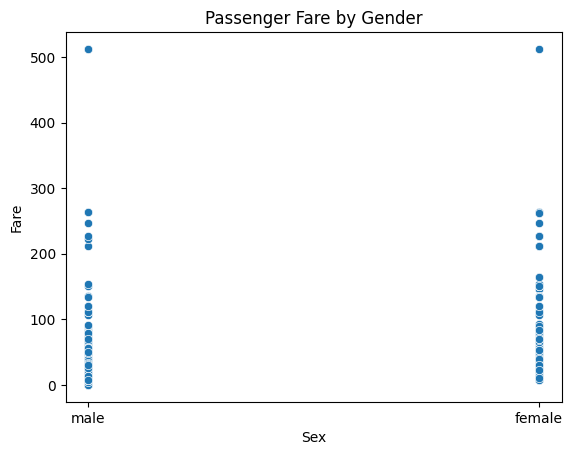

In [ ]:
#f
sns.scatterplot(x='Sex', y='Fare', data=df)
plt.title("Passenger Fare by Gender")
plt.show()


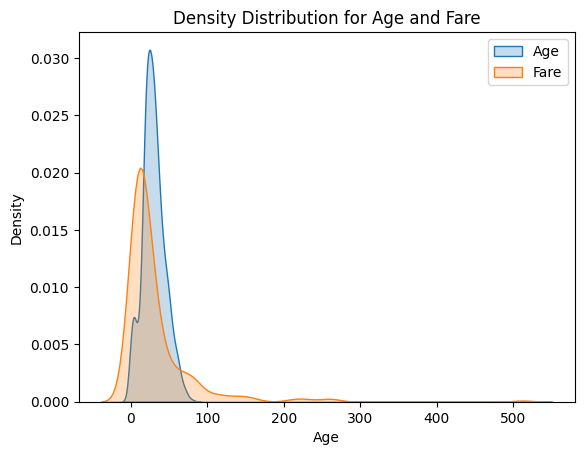

In [ ]:
#g
sns.kdeplot(df['Age'].dropna(), fill=True, label="Age")
sns.kdeplot(df['Fare'].dropna(), fill=True, label="Fare")
plt.title("Density Distribution for Age and Fare")
plt.legend()
plt.show()


Passenger Class Distribution:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


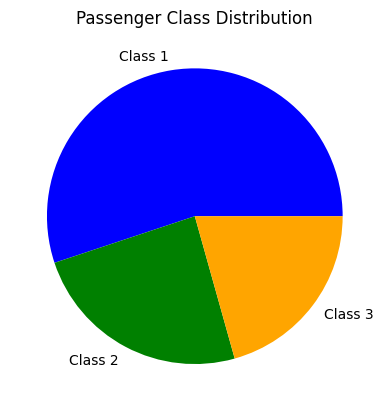

In [ ]:
#h
class_counts=df['Pclass'].value_counts()
print("Passenger Class Distribution:\n",class_counts)
plt.pie(class_counts, labels=['Class 1', 'Class 2', 'Class 3'], colors=['blue', 'green', 'orange'])
plt.title("Passenger Class Distribution")
plt.show()

In [ ]:
#i
survival_rate_by_class=df[df['Survived']==1].groupby('Pclass').size()/df.groupby('Pclass').size() *100
print("Survival rate by class:\n", survival_rate_by_class)


Survival rate by class:
 Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64
